In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
#read the data:
data = pd.read_csv('Hotel_bookings.csv', sep=',')

In [71]:
#get some more insight into what data is available for analysis
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [72]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [73]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [74]:
data['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [75]:
data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [76]:
data['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [77]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [78]:
data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [79]:
data['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [80]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [81]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [83]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [84]:
data_corr = data[['lead_time','stays_in_weekend_nights', 'stays_in_week_nights','adults',  'children','days_in_waiting_list','adr', 'total_of_special_requests' ]]
data_corr.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,days_in_waiting_list,adr,total_of_special_requests
0,342,0,0,2,0.0,0,0.0,0
1,737,0,0,2,0.0,0,0.0,0
2,7,0,1,1,0.0,0,75.0,0
3,13,0,1,1,0.0,0,75.0,0
4,14,0,2,2,0.0,0,98.0,1


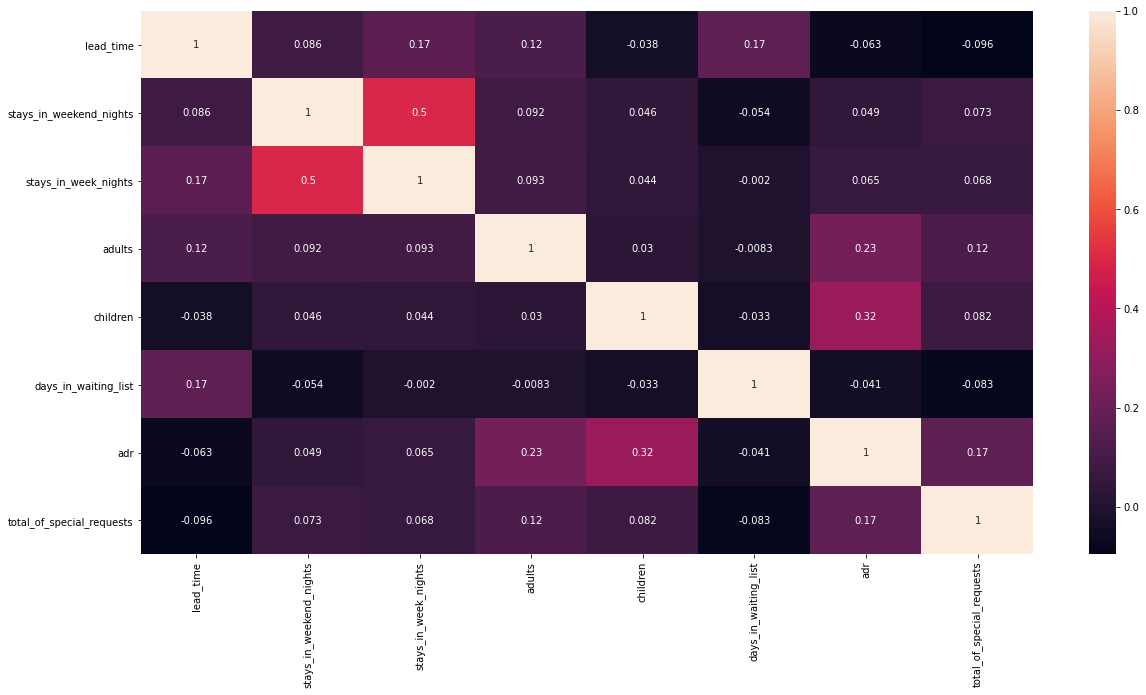

In [85]:

corrMatrix = data_corr.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

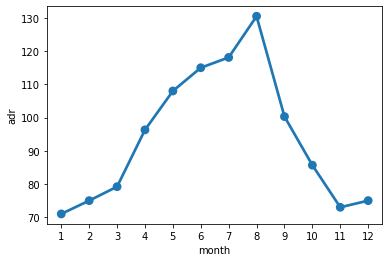

In [86]:
#check daily rate median depending on month of arrival 
Month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
data['month']=data['arrival_date_month'].map(Month)
ADR = data[['adr','month']].groupby(['month']).median().reset_index()
sns.pointplot(x='month', y='adr', data=ADR)


In [87]:
d=data.groupby(['month']).describe().adr
cm = sns.light_palette("green", as_cmap=True)
d = d.style.background_gradient(cmap=cm)
d


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,5929.000000,70.361241,28.373005,0.000000,51.000000,71.000000,85.000000,284.200000
2,8068.000000,73.582276,30.092552,0.000000,56.000000,75.000000,87.300000,284.200000
3,9794.000000,80.679646,63.101354,-6.380000,62.000000,79.200000,95.692500,5400.000000
4,11089.000000,100.380790,38.193729,0.000000,77.000000,96.300000,119.000000,336.000000
5,11791.000000,108.695516,42.875641,0.000000,80.100000,108.000000,132.600000,510.000000
6,10939.000000,116.672192,38.773671,0.000000,92.000000,115.000000,135.000000,333.670000
7,12661.000000,126.788013,52.064455,0.000000,90.000000,118.100000,155.100000,508.000000
8,13877.000000,140.111523,61.657384,0.000000,95.000000,130.500000,180.000000,450.000000
9,10508.000000,105.049657,43.004095,0.000000,74.897500,100.300000,130.000000,345.000000


In [88]:
#the greatest number of bookings falls on summer months. Not surprisingly, summer months are most expensive
#The max adr in March looks a way higher than for any other month. Looks like an outlier but let's check the details.
np.where(data['adr']==5400)

(array([48515], dtype=int64),)

In [89]:
#details of the booking for the adr =5400 below.
data.loc[48515]

hotel                                City Hotel
is_canceled                                   1
lead_time                                    35
arrival_date_year                          2016
arrival_date_month                        March
arrival_date_week_number                     13
arrival_date_day_of_month                    25
stays_in_weekend_nights                       0
stays_in_week_nights                          1
adults                                        2
children                                      0
babies                                        0
meal                                         BB
country                                     PRT
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                            A
assigned_room_type                      

In [90]:
#Find countries with greatest no of bookings:
top_booking_countries=data.country.value_counts()
top_booking_countries.head(10)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

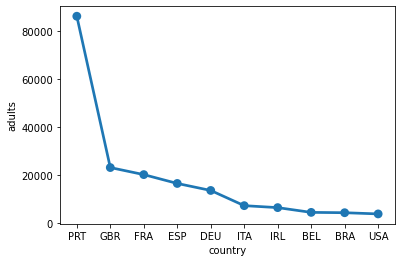

In [91]:
#Find countries with the greatest number of visitors (here:adult visitors)
Top_visitor_countries = data[['adults','country']].groupby(["country"]).sum().reset_index()
Top=Top_visitor_countries.sort_values(by='adults', ascending=False)
Top_10_visitor_countries=Top.head(10)
sns.pointplot(x='country', y='adults', data=Top_10_visitor_countries)


Text(0.5, 1.0, 'Number of bookings by hotel')

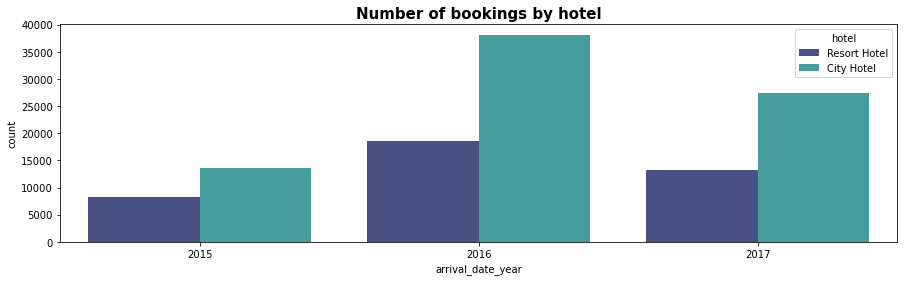

In [92]:
#which hotel is the most popular. Bookings by year:

plt.figure(figsize=(15, 4))
sns.countplot(x='arrival_date_year', hue= 'hotel', data=data, palette='mako')
plt.title("Number of bookings by hotel",fontweight="bold", size=15)

Text(0.5, 1.0, 'Hotel popularity by month')

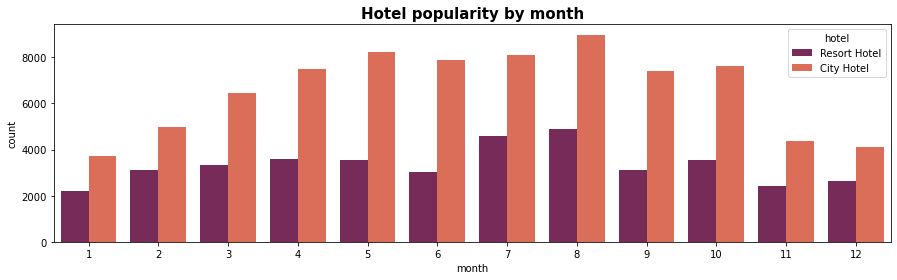

In [93]:
#how do the bookings change depending on month for each hotel?
plt.figure(figsize=(15, 4))
sns.countplot(x='month', hue= 'hotel', data=data, palette='rocket')
plt.title("Hotel popularity by month",fontweight="bold", size=15)

Text(0.5, 1.0, 'Hotel popularity by month')

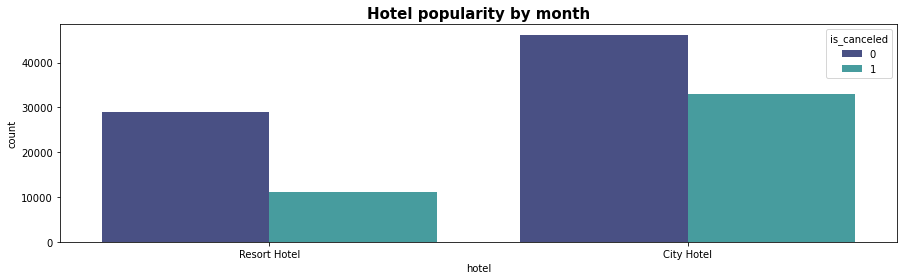

In [94]:
#let's see the number of cancellations (1) vs non-cancelled bookings (0)
plt.figure(figsize=(15, 4))
sns.countplot(x='hotel', hue= 'is_canceled', data=data, palette='mako')
plt.title("Hotel popularity by month",fontweight="bold", size=15)

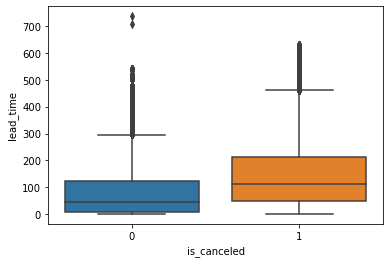

In [95]:
#lead time vs cancellations

sns.boxplot(x=data["is_canceled"], y=data["lead_time"]);
plt.show()
# looks like the bookings were typically less likely to be cancelled if booked closer to arrival date

In [96]:
# Let's check whether average daily rate for August depended on how much earlier the booking was made
data_Aug = data.loc[data['month'] == 8]
from bqplot import pyplot as plt
fig = plt.figure()
fig.layout.height = "300px"
fig.layout.width = "500px"
plt.scatter(data_Aug.lead_time, data_Aug.adr)
plt.xlabel("lead_time")
plt.ylabel("adr")
plt.show()
#conclusion: there doesn't seem to be a relation between adr and lead time for Aug